# Model Comparison Notebook
This notebook handles:
- Comparing Different Models Best Results
- Comparing Different Parameters for the Same Model


## Different Models

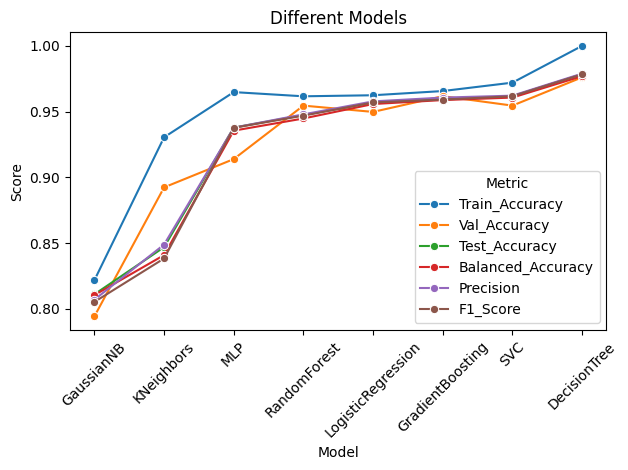

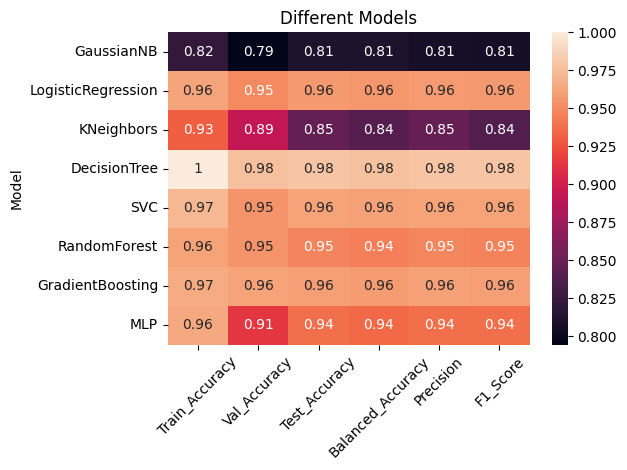

In [11]:
import joblib

trained_models_evaluator = joblib.load("utils/model_evaluator.pkl")
trained_models_evaluator.plot(plot_type="lineplot", title="Different Models", filename="Models_Accuracy")
trained_models_evaluator.plot(plot_type="heatmap", title="Different Models", filename="Models_Accuracy")

## Same Model, Different Parameters

In [12]:
from Model_Evaluation import ModelsEvaluator


def evaluate_parameters(model_name: str):
    param_grid = joblib.load("utils/param_grid.pkl")
    model_params = param_grid.pop(model_name)
    best_params = model_params.pop("best_params")
    params_count = len(model_params)
    model = joblib.load(f"models/{model_name}.pkl")
    for param in model_params:
        model_evaluator = ModelsEvaluator(param)
        if params_count == 1:
            for value in model_params[param]:
                model.set_params(**{param: value})
                model_evaluator.evaluate(f"{value}", model)
        else:
            other_params = dict()
            for other_param in best_params:
                if other_param != param:
                    other_params[other_param] = best_params[other_param]
            for value in model_params[param]:
                model.set_params(**{param: value, **other_params})
                model_evaluator.evaluate(value, model)
        model_evaluator.plot(plot_type="lineplot", title=model_name, filename=f"{model_name}_{param}", x=param)
        model_evaluator.plot(plot_type="heatmap", title=model_name, filename=f"{model_name}_{param}", x=param)

### Gaussian Naive Bayes Classifier

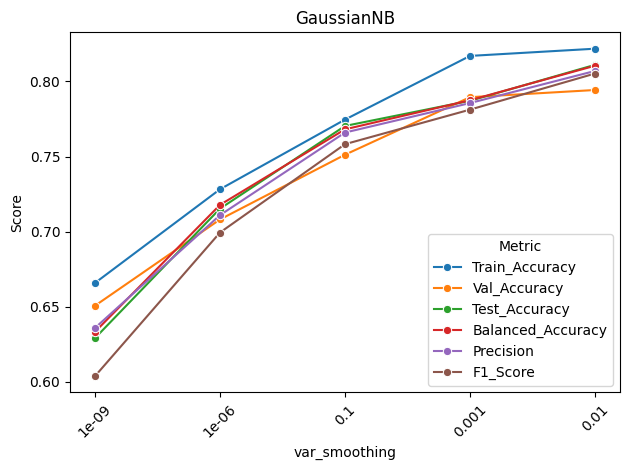

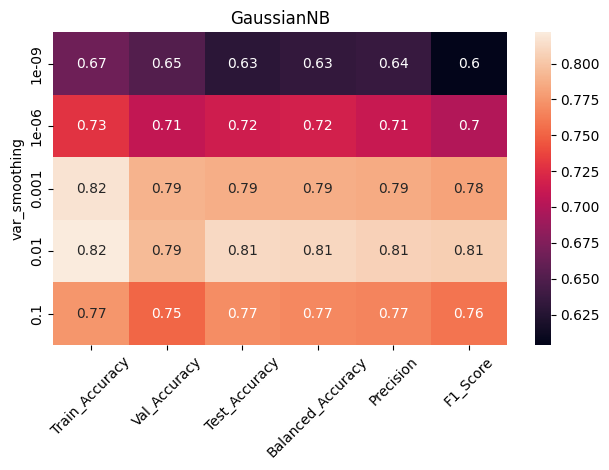

In [13]:
evaluate_parameters("GaussianNB")

### Logistic Regression Classifier

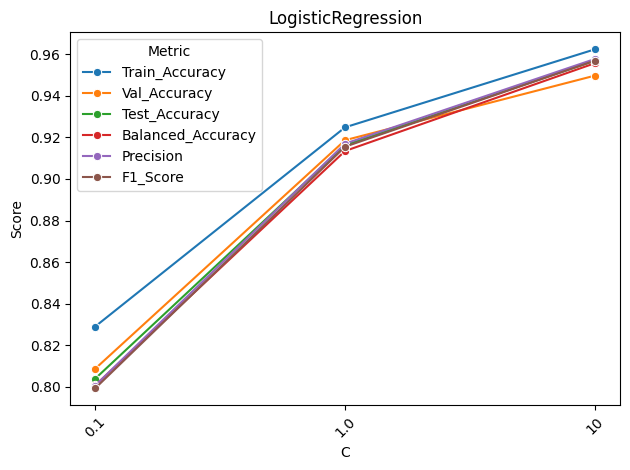

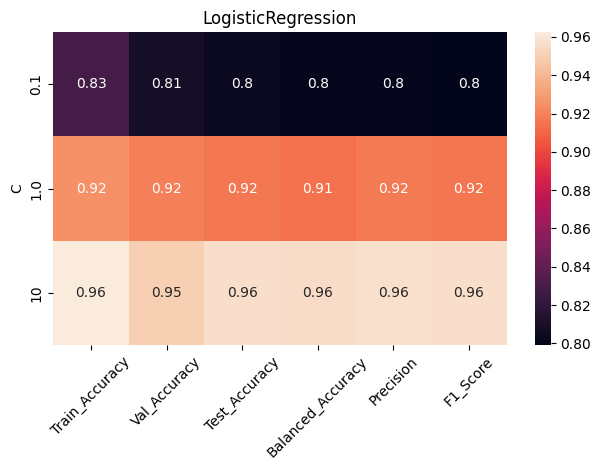

In [14]:
evaluate_parameters("LogisticRegression")

### K-Nearest Neighbors Classifier

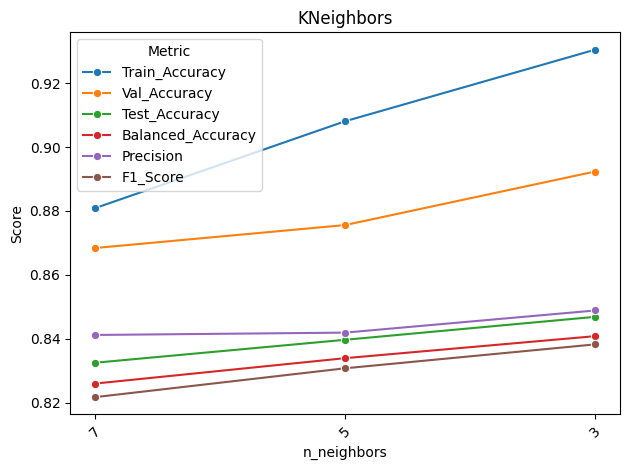

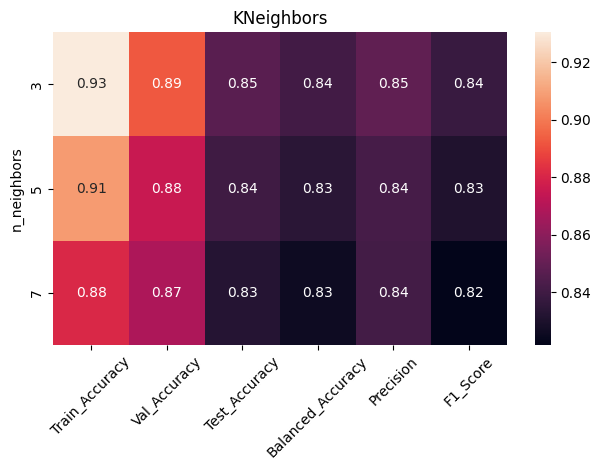

In [15]:
evaluate_parameters("KNeighbors")

### Decision Tree Classifier

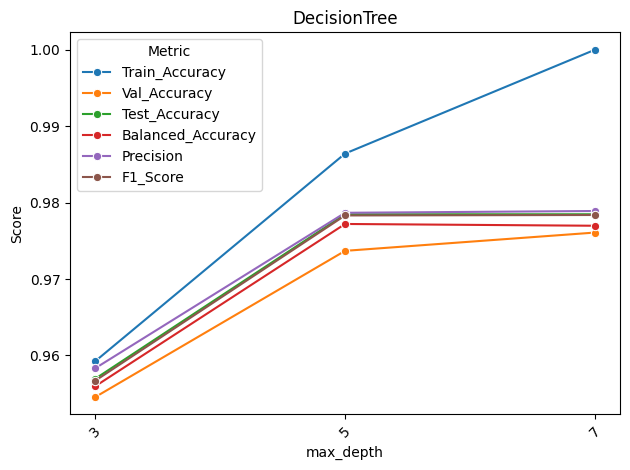

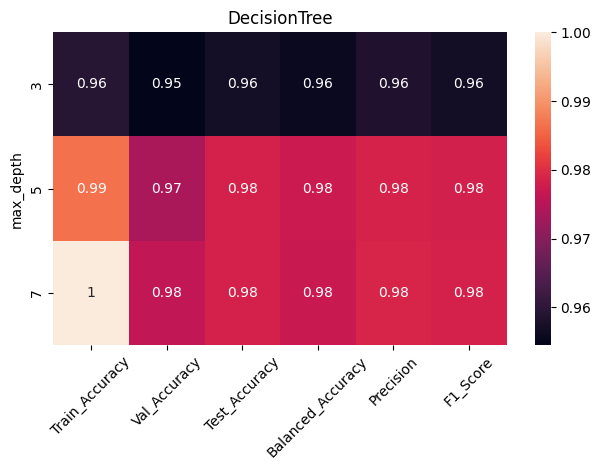

In [16]:
evaluate_parameters("DecisionTree")

### Support Vector Classifier

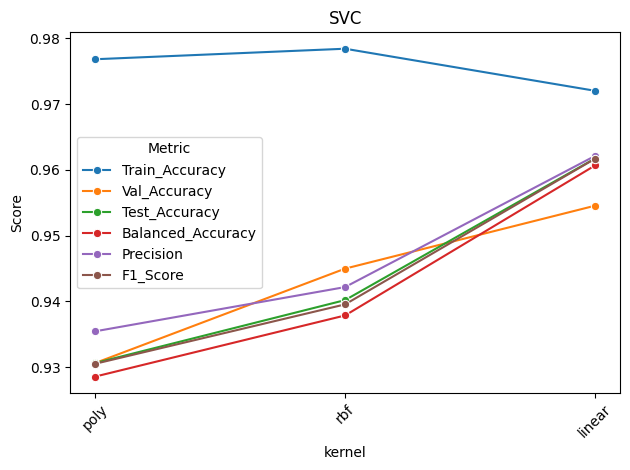

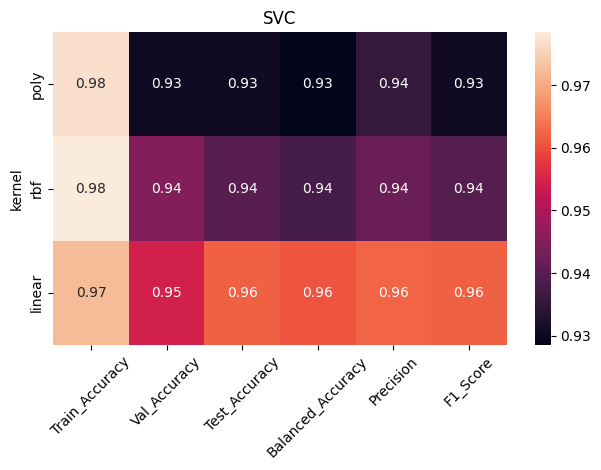

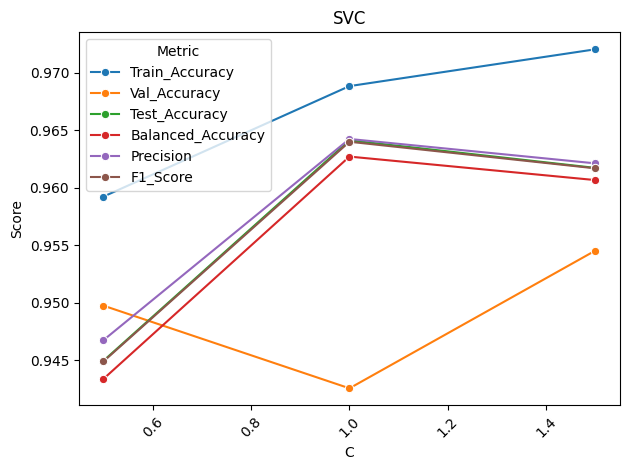

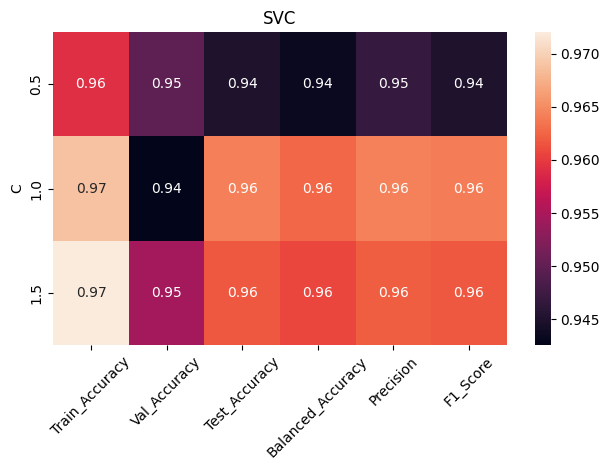

In [17]:
evaluate_parameters("SVC")

### Random Forest Classifier

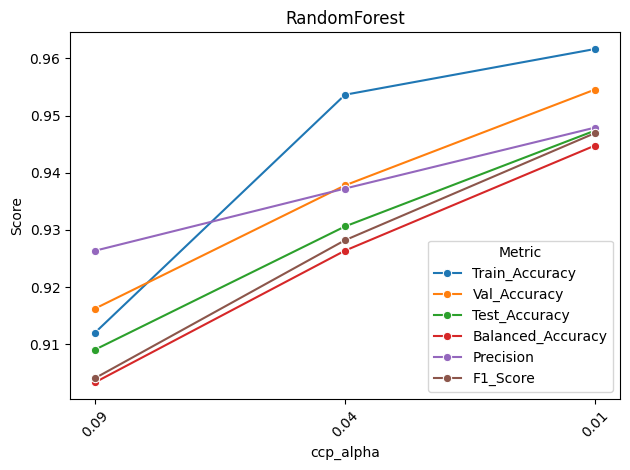

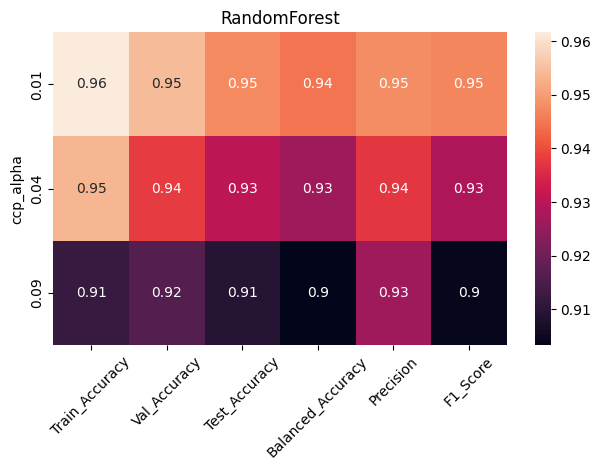

In [18]:
evaluate_parameters("RandomForest")

### Gradient Boosting Classifier

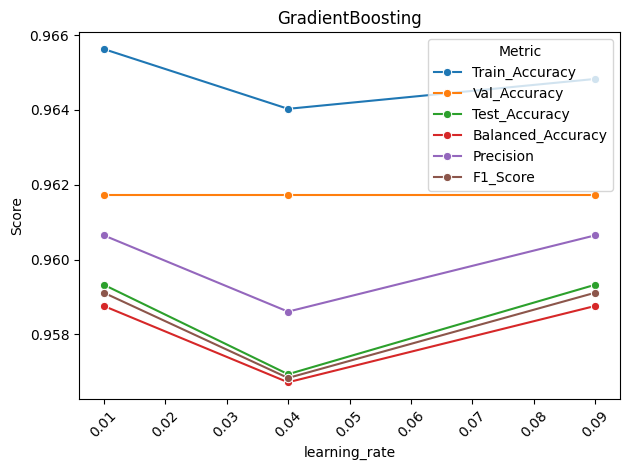

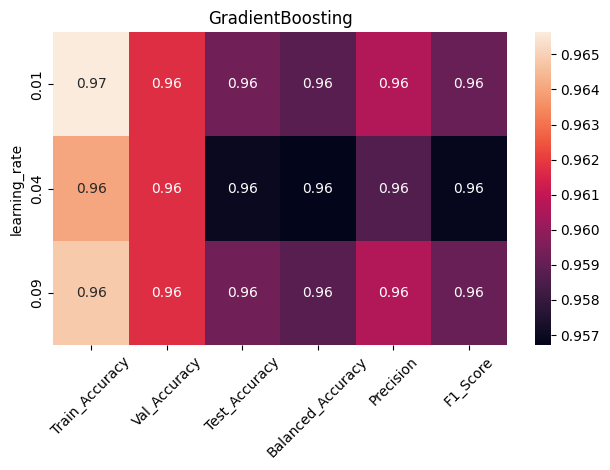

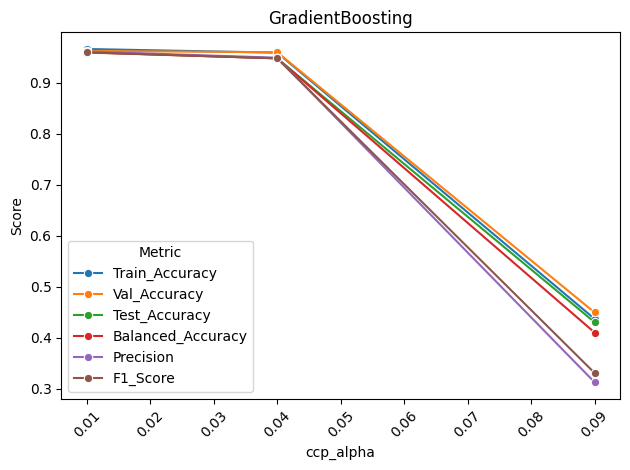

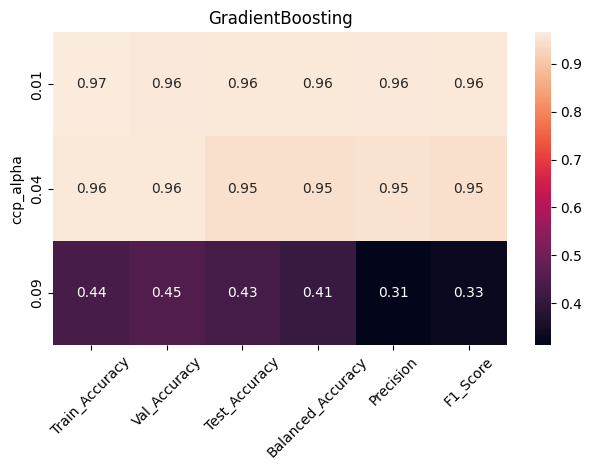

In [19]:
evaluate_parameters("GradientBoosting")

### Multilayer Perceptron Classifier

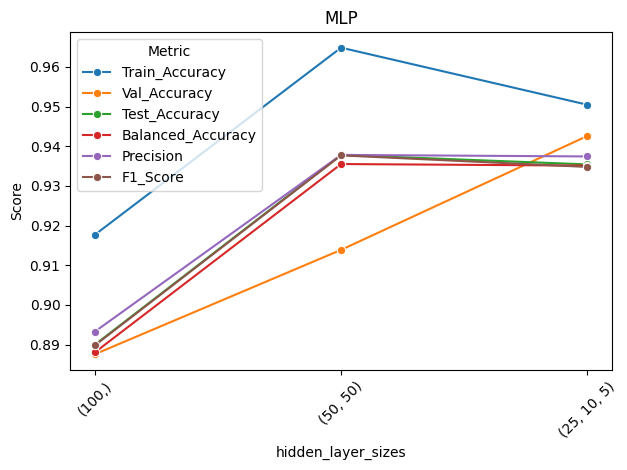

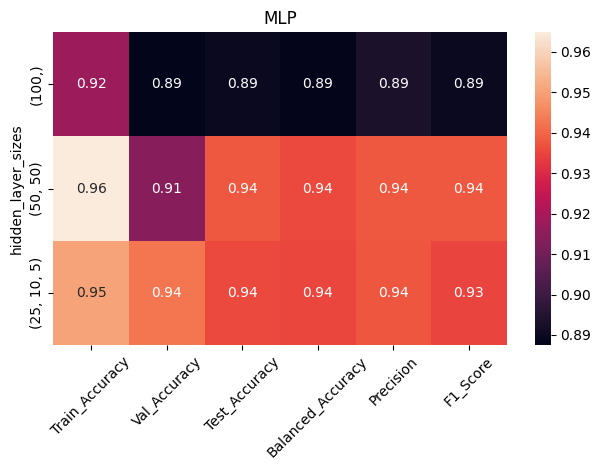

In [20]:
evaluate_parameters("MLP")